## Задача 1

Даны значения зарплат из выборки выпускников: 

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [98]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# выборка
data=np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])

# найдем среднее арифметическое
mean_manual= sum(data)/len(data)

# среднее квадратичное отклонение
dev= [(i - mean_manual) ** 2 for i in data]
sq_dev= np.sqrt(sum(dev)/len(dev))

print("Среднее арифметическое: ", mean_manual, "Среднее квадратичное отклонение: ", sq_dev)

#для проекрки используем существующие функции
print("Порверка: ",data.mean(), data.std(ddof=0))

среднее арифметическое:  65.3 среднее квадратичное отклонение:  30.823854398825596
Порверка:  65.3 30.823854398825596


## Задача 2

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [93]:
df = pd.DataFrame(data)
df.quantile([0.25, 0.5, 0.75])

,0
0.25,42.0
0.50,67.5
0.75,81.0


In [94]:
#интерквартильное расстояние
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
print(iqr)

0    39.0
dtype: float64


<AxesSubplot:>

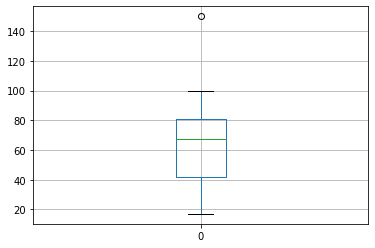

In [95]:
df.boxplot()

In [96]:
boxplot_range_1 = q1 - 1.5 * iqr 
boxplot_range_2 = q3 + 1.5 * iqr
outliers = df.loc[(df < boxplot_range_1) | (df > boxplot_range_2)]
outliers.shape[0]

ValueError: Cannot index with multidimensional key

## Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

In [97]:
#вероятность студента из факультета A
qa=0.25
pa=0.8
#вероятность студента из факультета B
qb=0.25
pb=0.7
#вероятность студента из факультета B
qc=0.5
pc=0.9

#доля сдавших студентов 
p_all=qa*pa+qb*pb+qc*pc


p_fa=qa*pa/p_all
print("Cтудент A: ",p_fa)

p_fb=qb*pb/p_all
print("Cтудент B: ",p_fb)

p_fc=qc*pc/p_all
print("Cтудент C: ",p_fc)

Cтудент A:  0.24242424242424246
Cтудент B:  0.21212121212121213
Cтудент C:  0.5454545454545455
